In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


parking_data = pd.read_csv("data.csv")
parking_data_clean = parking_data.drop(columns= {'location3', 'location4'})

for column in parking_data_clean.select_dtypes(include=['object']).columns:
    parking_data_clean[column].fillna(parking_data_clean[column].mode()[0], inplace=True)

for column in parking_data_clean.select_dtypes(include=['float64', 'int64']).columns:
    parking_data_clean[column].fillna(parking_data_clean[column].median(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
parking_data_clean['infraction_description'] = label_encoder.fit_transform(parking_data_clean['infraction_description'])
parking_data_clean['location1'] = label_encoder.fit_transform(parking_data_clean['location1'])
parking_data_clean['location2'] = label_encoder.fit_transform(parking_data_clean['location2'].astype(str))
parking_data_clean['province'] = label_encoder.fit_transform(parking_data_clean['province'])

# Convert to date-time
parking_data_clean['date_of_infraction'] = pd.to_datetime(parking_data_clean['date_of_infraction'], format='%Y%m%d')

# Extract day of week, month, and hour
parking_data_clean['day_of_week'] = parking_data_clean['date_of_infraction'].dt.dayofweek
parking_data_clean['month'] = parking_data_clean['date_of_infraction'].dt.month
parking_data_clean['hour'] = parking_data_clean['time_of_infraction'].astype(int)

# features and target variable
features = ['infraction_code', 'infraction_description', 'set_fine_amount', 'location1', 'location2', 'province', 'day_of_week', 'month', 'hour']
X = parking_data_clean[features]
y = parking_data_clean['infraction_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Training Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Training Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# predictions
y_pred_tree = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_tree)
decision_tree_report = classification_report(y_test, y_pred_tree)

# Evaluating the model
y_pred_forest = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred_forest)
random_forest_report = classification_report(y_test, y_pred_forest)

decision_tree_accuracy, random_forest_accuracy, decision_tree_report, random_forest_report


/Users/anikaawasthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anikaawasthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anikaawasthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users

(0.9999955163384626,
 0.999980784307697,
 '              precision    recall  f1-score   support\n\n         1.0       1.00      1.00      1.00       914\n         2.0       1.00      1.00      1.00     89836\n         3.0       1.00      1.00      1.00    311564\n         4.0       1.00      1.00      1.00     17034\n         5.0       1.00      1.00      1.00    251181\n         6.0       1.00      1.00      1.00     42820\n         7.0       1.00      1.00      1.00         3\n         8.0       1.00      1.00      1.00     53827\n         9.0       1.00      1.00      1.00     76532\n        10.0       1.00      1.00      1.00         1\n        11.0       1.00      1.00      1.00       307\n        12.0       1.00      1.00      1.00        74\n        13.0       1.00      1.00      1.00         8\n        14.0       1.00      1.00      1.00      3966\n        15.0       1.00      1.00      1.00     21250\n        16.0       1.00      1.00      1.00      7192\n        17.0       1

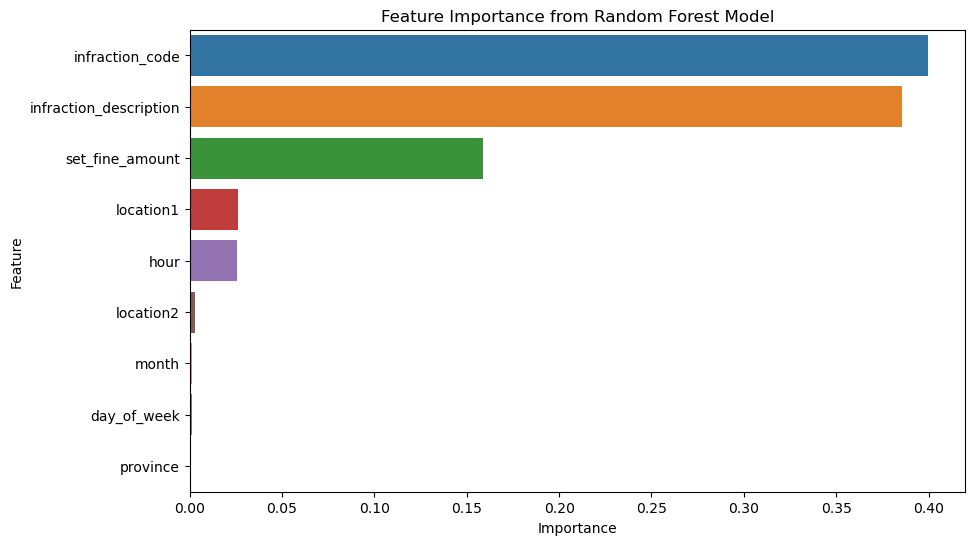

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
feature_importances = random_forest.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()